
## 2: Distributions, Moments, and Errors: 

These problems are provided as Jupyter notebooks, so that you can edit your own version and include some simple calculations. You don't have to - you can do your own calculations any way you like - but it will get you used to doing statistics calculations with Python, which will gradually be more powerful in later weeks.



This is the version with solutions.

# Level 1 Problems: simple calculations
These are what you might call "plug-in" problems. If you identify the concept or key formula that applies, it should be a fairly simple calculation to get the right answer.

### P2.1  Probability distribution functions
$x$ is a random variable evenly distributed between 0 and 1, what is its PDF and CDF?
$y$ is a random variable evenly distributed between 0 and 2, what is its PDF and CDF?
$y$ and $z$ are independent random variables between 0 and 2, what is their joint PDF p(y,z)?

You are not asked for the CDF c(y,z) - try to think how such a thing could be defined. 

**solution**
In each case, the PDF is constant and normalised, and the CDF is its integral, so

$p(x) = 1;$  $c(x) = x$

$p(y) = \frac{1}{2}$;   $c(y) =  \frac{y}{2}$

$p(y,z) = \frac{1}{4}$;

The question didn't ask for the CDF of $p(y,z)$.  A CDF $c(y,z)$ needs to be carefully defined, one sensible way is "the probability of being less than y *and* z" which would be the double integral $c(y,z)=yz/4$.  Alternately "the probability of being less than y *or* z"= $c(y,z)=y/2+z/2-yz/4$.  Or even a conditional CDF "the probability of being less than y, given a fixed value of z" which here is $c_y(y,z) = y/2$, independent of $z$ because they are independent variable. 

### P2.2 Die expected value
What is the expected value and variance of a rolled die?

**Solution**  
The expected value is $\sum{X_iP(X_i)}$. In this case, the possible values are $X = 1, 2..6$ and the various $P$s are all 1/6. The calculation is below. Note that the expected value is *not* one of the possible values..

For the variance  $\sum({X_i-\overline(X))^2 P(X_i)}$

In [1]:
from math import *  # ^ for squared is part of the basic maths routines
E=(1+2+3+4+5+6)/6.
print("Expected value=",E)

V = ( (1-3.5)**2 + (2-3.5)**2 + (3-3.5)**2 + (4-3.5)**2 + (5-3.5)**2 + (6-3.5)**2 )/6
print("Variance=",V, "; sigma=",sqrt(V))


Expected value= 3.5
Variance= 2.9166666666666665 ; sigma= 1.707825127659933


### P2.3 Card expected value
A card is picked at random from eight cards with values 2 to 9 inclusive. What is the expected value of the card drawn?

**Solution**  Same as previous: add the possible values and divide by the number of them.

In [18]:
E=(2+3+4+5+6+7+8+9)/8.
print("Expected value for draw from 8 cards=",E)

Expected value for draw from 8 cards= 5.5


### P2.4 Transformation of variance 
A random value $y$ is formed from another random variable $x$ as $y = 2x$. How does
the variance in $y$ compare to the variance in $x$?

#### solution ####

Start with the variance, $\sigma_y$, written as a sum

$$\sigma_y = \lim_{i=N\rightarrow\infty} \frac{1}{N}\sum(y_i-\overline{y})^2$$

Write it in terms of x

$$\sigma_y = \lim_{i=N\rightarrow\infty} \frac{1}{N}\sum(2x_i-\overline{2x})^2$$

Trivially  $\overline{2x} = 2 \overline{x}$, so 

$$\sigma_y = 4\lim_{i=N\rightarrow\infty} \frac{1}{N}\sum(x_i-\overline{x})^2=4\sigma_x$$

So if all numbers are doubled, the variance quadruples.  This becomes obvious if you consider units, e.g. $y$ is price in pennies, $x$ is price in tuppences.


### P2.5 Probability ranges
A random variable $x$ has the PDF $f(x)=k e^{-3x}$ for $x>0$ and $f(x)=0$ elsewhere. Find the probability that $x$ lies between 0.5 and 1.0.

Suppose the PDF was  $f(x)= k . \cos(x) \exp(-3x.\sin(x))$ on the domain $-\pi/2 < x < \pi/2$.  Now what is the probability that $x$ lies between 0.5 and 1.0.

**Solution**  

First we find the value of $k$ from the requirement that the integral of PDF is 1, then we solve the integral

As a matter of principle, we like to look at the distribution so we plot the function using cut and paste from the Basic-plotting notebook (cell below).
We can also solve the integral numerically there.

Or we can solve analytically

$$\int_{-\infty}^{+\infty} f(x) dx 
= \int_0^{+\infty} k e^{-3x} dx
= \left[ k \frac{e^{-3x}}{-3} \right]_0^\infty = \frac{k}{3} = 1$$

and so $k=3$. Then the probability between 0.5 and 1.0 is

$$\int_{0.5}^{1.0} 3 e^{-3x} dx = \left[ -e^{-3x} \right]_{0.5}^{1.0} = -e^{-3} + e^{-1.5} = 0.173 $$


In the second case, solving it analytically is challenging, its a tiny edit to the code...

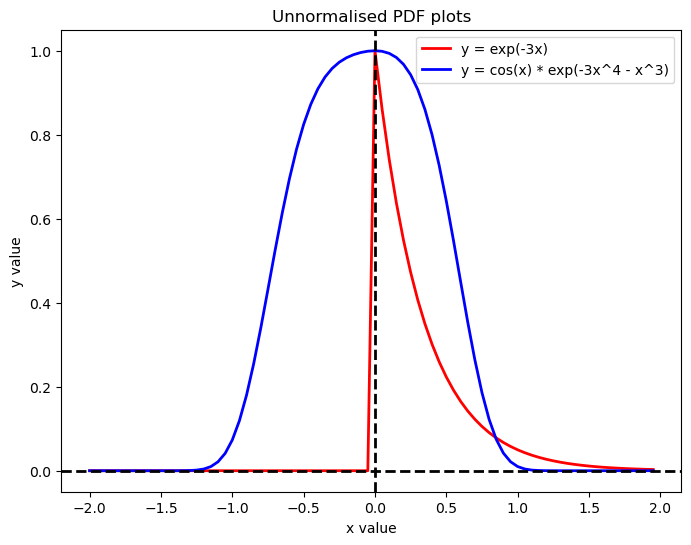

Normalisation constant, k: 3.000000000000078
Result of the integration: 0.17334309178057042
Estimated error: 1.92449491654501e-15
Normalisation constant part 2, k: 1.029204511289448
Result of the integration part 2: 0.09485457169791789
Estimated error part 2: 1.0530972948998618e-15


In [19]:
from math import *  # basic maths routines
import numpy as np  # more advanced numerical stuff
import scipy.integrate as integrate
import matplotlib.pyplot as plt
#output_notebook()  # plot inside the notebook


# Define the function to be integrated
def f(x):
    # Use numpy.where for element-wise condition
    return np.where(x > 0, np.exp(-3 * x), 0)


# Define the other function to be integrated 
def f2(x):
    return np.cos(x)*np.exp(-3*x*np.sin(x))


xmin=-2.0; xmax=2.0  # set the range of x
x=np.arange(xmin,xmax,0.05) # create x-ray array going in steps of 0.05
y=f(x)
ymin=np.min(y); ymax=np.max(y) 
y2=np.cos(x)*np.exp(-3*x**4-x**3)

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the lines from our calculated arrays
ax.plot(x, y, label='y = exp(-3x)', linewidth=2, color='red')
ax.plot(x, y2, label='y = cos(x) * exp(-3x^4 - x^3)', linewidth=2, color='blue')

# Plot a horizontal dashed line at y=0
ax.axhline(0, linestyle='--', color='black', linewidth=2)

# Plot a vertical dashed line at x=0
ax.axvline(0, linestyle='--', color='black', linewidth=2)

# Set labels and title
ax.set_xlabel('x value')
ax.set_ylabel('y value')
ax.set_title('Unnormalised PDF plots')
ax.legend()

# Show the Matplotlib plot
plt.show()

# For normalisation, Integrate the function from 0 to infinity (use a large upper limit for infinity)
norm, error = integrate.quad(f, 0, float('inf'))
k=1/norm
#  repeat for problem at hand, integrating the function between the asked-for limits
result, error = integrate.quad(f, 0.5, 1.0)
result=result*k
print("Normalisation constant, k:", k)
print("Result of the integration:", result)
print("Estimated error:", error*k)


# For normaliation, Integrate the function across the region where it is defined
norm, error = integrate.quad(f2, -np.pi/2, np.pi/2)
k=1/norm
#  repeat for problem at hand
result, error = integrate.quad(f2, 0.5, 1.0)
result=result*k
print("Normalisation constant part 2, k:", k)
print("Result of the integration part 2:", result)
print("Estimated error part 2:", error*k)





### P2.6  Joint PDFs
Two random variables $x$ and $y$ follow the joint PDF $f(x,y)=\frac{2}{3}(x+2y)$ for $x$ and $y$ between 0 and 1, and 0 elsewhere.   
Show that this is properly normalised, and find the separate PDFs for $x$ and $y$.
Are the variables independent?

**Solution**  
For normalisation, we require that 

$$ \int_{-\infty}^{\infty}f(x,y) dy = 1 $$

So that 

$$ \int_0^1 \int_0^1  \frac{2}{3}(x+2y) dydx = \int_0^1 \frac{2}{3}(x+1) dx =  \frac{2}{3}[x^2/2+x]_0^1 = \frac{1}{3}+\frac{2}{3}=1 $$

We also require that the PDFs for $x$ and $y$ integrate to 1.


To find density for $x$, we integrate over all values of $y$. So

$$g(x) = \int_{-\infty}^{\infty}f(x,y) dy = \int_0^1 \frac{2}{3}(x+2y) dy = \frac{2}{3}(x+1) $$

and likewise

$$h(y) = \int_{-\infty}^{\infty}f(x,y) dx = \int_0^1 \frac{2}{3}(x+2y) dx = \frac{1}{3}(1+4y) $$

For the conditional distribution $f(y|x)$ we have

$$\frac{\frac{2}{3}(x+2y)}{\int\frac{2}{3}(x+2y)dy}= \frac{(x+2y)}{(x+1)}$$

Which does depend on $x$, so they are not independent

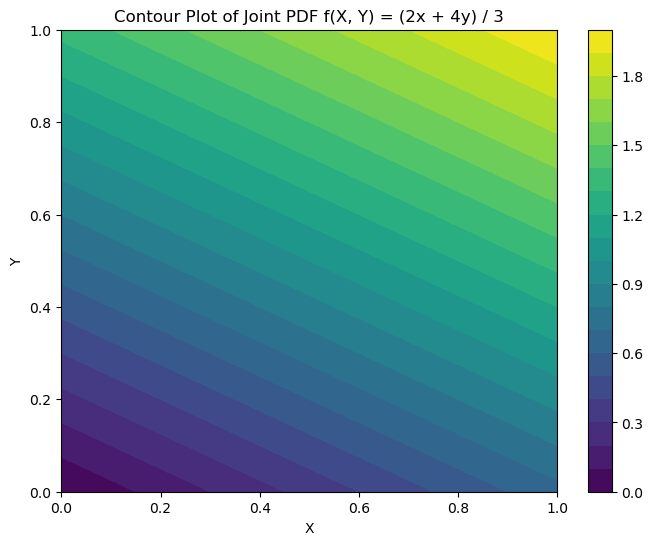

In [21]:
#  Lets show this in code.  You dont need to be able to write the code!
import numpy as np
import matplotlib.pyplot as plt

# Define the joint PDF
def joint_pdf(x, y):
    return (2 * x + 4 * y) / 3

# Set the range for x and y
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

# Create a meshgrid for plotting
X, Y = np.meshgrid(x, y)

# Calculate the PDF values over the grid
Z = joint_pdf(X, Y)

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, cmap='viridis', levels=20)

# Add a colour bar to show the scale of the PDF values
plt.colorbar(contour)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Joint PDF f(x,y) = (2x + 4y) / 3')

# Show the plot
plt.show()


## P2.7  Dice with many sides
One can find polyhedral dice with various numbers of sides, such as a four-sided (tetrahedral) die with values 1,2,3,4.  What is the expected value of the total when four such dice are rolled?  What about M  N-sided dice?

**Solution**  
The value on each die is treated as a distinct random variable, which we can call $X_1, X_2, X_3, X_4$. The sum on all four dice is a new random variable $X_{sum}=X_1+X_2+X_3+X_4$. The various values of $X_{sum}$ do not all have the same probability - compare with the sum of two dice problem in the notes. So you might think we need to work out all those probabilities and then calculate the expected value as $E[X_{sum}]=\sum{X_{sum}(i) P(i)}$ But in fact we know that means can be added $E[X+Y] = E[X] + E[Y]$, so in fact we just need the expected value for one die, and multiply by four.

In [4]:
E1=(1+2+3+4)/4.
Esum=E1*4
print("Expected value for a single D4=",E1)
print("Expected value for the sum of four D4s=",Esum)

Expected value for a single D4= 2.5
Expected value for the sum of four D4s= 10.0


For an N-sided die the expected value is given by the sum of the faces divided by the number of faces $N(N+1)/2N$

So the expected value when $M$ are tossed is $$M(N+1)/2$$

# Level 2 Problems: formulating problems
These are more like real-world problems. The key skill is being able to translate a physical description into appropriate mathematics, and then identifying the concepts and formulae you need to apply. Sometimes at that point its a straightforward calculation, but more often you need a bit more mathematical manipulation, keeping the physical meaning in mind, and then finally calculating.   

### P2.8  Non-linear dice scoring

If $x$ is the number scored with one roll of a die, what is the expected value of the random variable $g(x)=2x^2+1$?  What is its variance?

**Solution**  
Note that here both $x$ and $g$ are discrete variables. We have 
$$E[g(x)] =\sum_{x=1}^6 (2x^2+1) p(x)$$

but the probability $p(x)=1/6$ for all values of $x$.   
We can do the calculation by hand, or with python (below)   
The expectation value is therefore

$$\frac{1}{6} \left[(2\times 1^2+1) + ... (2\times 6^2+1)  \right] = \frac{94}{3} $$ 

the variance, using the equation in the notes for non-zero mean is

$$\frac{1}{6} \left[(2\times 1^2+1)^2 + ... (2\times 6^2+1)^2  \right] - (\frac{94}{3})^2 $$ 

In [24]:
#  Now do it with code
sum=0.0
sumsq =0.0
#  Use the neat trick proved in 2.10 below which requires just one loop
for i in range (1,7):     # note for-range does not include upper end
    term=2.*i*i + 1
    sum=sum+term
    sumsq=sumsq+term*term
    print(i,term,sumsq)
    
E=sum/6.
V=sumsq/6-E*E
print("Expected value of score=",round(E,2))
print("Variance of score=",round(V,2))

# Or, we can use E in the standard variance calculation
var=0
for i in range (1,7):     # note for-range does not include upper end
    term=2.*i*i + 1
    var=var+(term-E)*(term-E)
var=var/6
print("Variance of score (other method)=",round(var,2))
print("Standard deviation=",round(math.sqrt(var),2))
    

1 3.0 9.0
2 9.0 90.0
3 19.0 451.0
4 33.0 1540.0
5 51.0 4141.0
6 73.0 9470.0
Expected value of score= 31.33
Variance of score= 596.56
Variance of score (other method)= 596.56
Standard deviation= 24.42


<figure style="text-align: center">
<br>
<img src="Fig2R.jpg" alt="hmm" width="600">
<br>
 <figcaption>
      <em>Data Table from Chapter 2. Measurements of 3000 individuals, binned
          into various ranges of head-length and head-breadth.</em>
</figcaption>
</figure>

### P2.9  PDFs from a table
From the data in Table 1 of the Chapter-2 notes, reproduced below, estimate the mean, median, and mode for the  for head length and head breadth.  State the approximation that you are making.  Are the mean, median and mode the same?

**Solution**  

This problem is all about how to estimate from real data, as well as understanding how to get a distribution for a single variable from a bivariate distribution.

There will be a continuous range of lengths and widths, but the data is presented as bins.  We have to make some estimate about how the PDF looks within the bin.  The simplest option is to assume everyone is in the middle, but the population of adjacent bins might give a hint that that isn't true.

The so-called "marginalised distribution" for head length is the relative frequency for head length summed over all possible values of head breadth, which is given by the final column on the right (margin) of the table. This is a binned dataset, so to *estimate* the mean we take the the number in each bin as representative of the value at the centre of the bin. Our estimate of the mean is therefore

In [6]:
sum=1*16.25 + 2*16.75 + 14*17.25 + 54*17.75 \
+ 269*18.25 + 693*18.75 + 1026*19.25 + 645*19.75 \
+ 249*20.25 + 44*20.75 +3*21.25
mu_headlength=sum/3000.     

print ("estimated mean headlength=",round(mu_headlength,2))

estimated mean headlength= 19.22


To estimate the median, add the numbers in successive bins up to the sixth bin, which gives 1033. To get halfway, we need 1500; so we have another 467 to go. The next bin has a value 1026, so we need to go 46% of the way through a bin of width 0.5; so finally our estimate of the median is 19.23,  pretty close to the mean. 

The mode is also quite close; the highest bin is 19.0-19.5: the centre of the highest bin is 19.25, which we can take as our estimate of the mode. 


Going through the same exercise for head breadth, the mean is 15.10; the median is about 15.09. 
The highest bin is 15.0-15.25, but the lower bin has almost twice the value of the upper bin, so we might infer that the peak is about a third of the way through the highest bin, i.e. about 15.17

In both cases then, the mean, median and mode look to be fairly similar. They may not be exactly the same, but there is no obvious evidence for differences. If we have all 3000 individual measurements, we could calculate the mean and the median much more precisely; we could also use smaller bins and get a more accurate mode.

### P2.10  Handy variance formula

By expanding the square, prove that $\sigma^2=E[x^2] - E[x]^2$.
This is a very helpful expression for codes which are continually collecting data $x$. It enables us to continually update $\sigma^2$ without storing all previous values of $x$.

**Solution**  
The variance is defined as the expected value of the square of the deviation from the mean. The mean is just $E(x)$, so $\sigma^2 = E[ (x-E(x))^2]$. So then 

\begin{align*}
\sigma^2 & = E[ (x-E(x))^2] \\
&=E[x^2 - 2xE(x) + E(x)^2] \\
&=E(x^2) - E[2xE(x)] + E(x)^2 \\
&=E(x^2) - 2E(x)E(x) + E(x)^2 \\
&=E(x^2) - 2E(x)^2 + E(x)^2 \\ 
&=E(x^2) - E(x)^2 \\ 
\end{align*}

which is the result required.

# Level 3 Problems: needs some thought

These problems are not so straightforward, the first invites you to think about statistical significance, the second emphasizes how the zero of the measured quantity can affect moments. Like the moment of inertia, where you need to know both the object and the axis of rotation. 

But first, have a play with the notebook to see how "theory" and "experiment" may not coincide.

### Experimenting

Review the pop-vs-sample notebook.  Cut and paste the code for simulated coin tosses into your own version and run it.

Play with the number of coins and the number of runs, and for given values, run the notebook multiple times. You should see:

(1) the observed values never quite match the prediction.   
(2) the observed values are different every time, jumping around the predicted values  
(3) if you increase the number of runs, the observed values look closer to the prediction.

### Error on the distribution

Calculate the root mean square error between the prediction and the observation: 
(1) how does it vary with number of observations, nrun?
(2) how does it vary with the number of coins, ncoins?

### Error on the mean

Calculate the difference between the calculated mean from the observation, and the theoretical value.
Treat this difference as a random variable, $z$ and plot its distribution 

### P2.11  A new particle
If some function $f=ax+by$, is defined by constants $a$ and $b$ and independent measurements $x$ and $y$, what isthe variance of $f$ in terms of the variances of $x$ and $y$?

Two particle physics labs are attempting to measure the mass of a new particle. Lab A gets $m_A=1326\pm150$ MeV; Lab B gets $m_B=1560\pm125$ MeV. The reported errors are $1 \sigma$.  There is a suspicion that Lab B always has some offset in its measurements. What is the error on the difference between the two mass estimates? What about the ratio of the two mass estimates?  Is the suspicion justified?

**Solution**  
From the notes,  if $f=ax+by$, and the measurements are independent, $\sigma_{ax}^2= a^2\sigma_{a}^2$.  Then we add the variances $\sigma_{f}^2 = a^2\sigma_{x}^2 + b^2\sigma_{y}^2$. 

We start by assuming that the particle does have a well defined mass, and the $\pm$ are measurement errors. We then consider the error on the mean $\sigma_M$.

The difference in results $\Delta m = m_B-m_A$
  
Here, we have we have $a=1$ and $b=-1$ and so  
$\sigma_{\Delta m}^2 = \sigma_{A}^2 + \sigma_{B}^2$  
Plugging this in

In [1]:
from math import * ## need this to use sqrt function!
sigA=150.
sigB=125.
sigDm=sqrt(sigA*sigA + sigB*sigB)

print("Error on difference =",round(sigDm,2))


Error on difference = 195.26


Note that as $\Delta m=234 eV$ the error on the difference is only 1.2$\sigma$, which is quite likely due to chance.

For a ratio $f=x/y$ we have  $ \left(\sigma_f /f \right)^2  
= \left(\sigma_{Mx} / x \right)^2  + \left(\sigma_{My} / y \right)^2 $

so we can use $x=m_A$ and $y=m_B$ and the appropriate $\sigma_M$s and calculate: 

In [2]:
mA=1326. # note taking sigA,sigB from cell above
mB=1560.
R=mA/mB
sigR=R * sqrt(  (sigA/mA)**2 + (sigB/mB)**2  )

print ("Ratio=", round(R,3), "  Error on ratio =",round(sigR,3))


Ratio= 0.85   Error on ratio = 0.118


So the ratio differs from 1.0 by 1.27$\sigma$,  (1.27=0.15/0.118) again possibly just chance. (If you do B/A instead of A/B you get $1.176\pm 0.163$ ).   So we cannot the reject hypothesis.  Notice that a different hypothesis, such as  "Lab B has measurements offset by 1000MeV" would be rejected by the data at the so-called $5\sigma$ level.

### P2.12  Re-centred moments
The $n$'th moment is defined as $E[x^n]$, and the centred moment as $\mu_n=E[(x-\mu)^n]$. More generally we could define the moment with respect to the arbitrary point $x_a$ as $E[(x-x_a)^n]$.  Derive expressions for the zeroth, first and second moments  of a sample distribution in terms of the standard sample mean and variance, with respect to the point $x=x_a$.

**Solution**  
We use the fact that $\bar{x}={\sum x_i} / N$ and the result from the above question that $s^2= {\sum x_i^2} / N - \bar{x}^2$.

The expectation value of the $n_{th}$ moment with respect to $x=x_a$ is defined as
$$ \mu_n^a =\frac{1}{N} \sum_{i=1}^N (x_i-x_a)^n$$
For $n=0$, each sum in the term is just 1, so $\mu_0^a=1$. 

For $n=1$ we get
$$ \mu_1^a = \frac{1}{N}\sum x_i - \frac{1}{N}\sum x_a 
= \bar{x} - \frac{1}{N}\cdot Nx_a = \bar{x}-x_a$$ 

For $n=2$ we have 
\begin{align*}
\mu_2^a &=\frac{1}{N} \sum(x_i=x_a)^2 \\
&=\frac{1}{N}\sum x_i^2 - \frac{1}{N}\sum 2x_i x_a + \frac{1}{N}x_a^2 \\
&=\frac{1}{N}\sum x_i^2 - 2x_a\bar{x} + x_a^2
\end{align*}
but $\sum x_i^2/N = s^2 +\bar{x}^2$ and so we get
$$ \mu_2^a = s^2 + \bar{x}^2 - 2x_a\bar{x} + x_a^2 = s^2 + (\bar{x}-x_a)^2$$
